In [37]:
import matplotlib.pyplot as plt
import numpy as np

def create_boxplot(data, title="Title", y_label="y-values", ausreiser=False, ausreiser_grenzen=False):

    fig, ax = plt.subplots(figsize=(10, 6))
    
    fig.patch.set_facecolor('#FFFBE9')
    
    # Sortierte Daten
    data_sorted = sorted(data)

    # Manuelle Berechnung der Quartile nach Tukey-Methode
    def tukey_quartile(data, quartile):
        n = len(data)
        if quartile == 25:  # 1. Quartil
            k = (n + 1) * 0.25 - 1
        elif quartile == 75:  # 3. Quartil
            k = (n + 1) * 0.75 - 1
        else:
            raise ValueError("Quartile can only be 25 or 75.")
        
        lower_index = int(np.floor(k))
        upper_index = int(np.ceil(k))
        
        if lower_index == upper_index:  # Genau auf einem Datenpunkt
            return data[lower_index]
        else:  # Linear interpolieren
            return data[lower_index] + (k - lower_index) * (data[upper_index] - data[lower_index])

    q1_value = tukey_quartile(data_sorted, 25)
    q3_value = tukey_quartile(data_sorted, 75)
    iqr = q3_value - q1_value
    lower_bound = q1_value - 1.5 * iqr
    upper_bound = q3_value + 1.5 * iqr

    # Daten für den Boxplot vorbereiten
    if not ausreiser:
        # Wenn Ausreißer nicht angezeigt werden sollen, entferne diese aus den Daten
        data_for_boxplot = [point for point in data if lower_bound <= point <= upper_bound]
    else:
        data_for_boxplot = data  # Alle Daten verwenden, wenn Ausreißer angezeigt werden sollen
    
    # Boxplot zeichnen
    flierprops = dict(marker='o', markerfacecolor='#FF2E63', markersize=8, linestyle='none')
    
    bplot = ax.boxplot(
        data_for_boxplot,
        patch_artist=True,
        medianprops=dict(color='#F07B3F', linewidth=2),
        flierprops=flierprops if ausreiser else dict(marker='')  # flierprops nur verwenden, wenn ausreiser=True
    )
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel('Werte')
    
    # Rahmenlinien entfernen:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.set_xticks([])  # Entfernt die x-Achsen-Ticks und damit die "1"
    ax.grid(
        True,
        linestyle="--",
        alpha=0.7,
        axis="y"
    )
    
    # Farbe hinzufügen:
    ax.set_facecolor('#FFFBE9')
    colors = ['#3282B8', 'orange', 'tomato']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
    # Filterung der Daten ohne Ausreißer für den Scatter-Plot
    non_outliers = [point for point in data if lower_bound <= point <= upper_bound]
    
    # Jitter (leichte Verschiebung) auf der x-Achse hinzufügen, um Überlagerungen zu vermeiden
    x_positions = np.random.normal(1, 0.04, size=len(non_outliers))
    ax.scatter(
        x_positions,
        non_outliers,
        alpha=0.6,
        color='#FF2E63',
        zorder=3
    )
    
    # Ausreißer-Grenzen als horizontale Linien anzeigen, wenn ausreiser_grenzen=True
    if ausreiser_grenzen:
        ax.axhline(y=lower_bound, color='blue', linestyle='--', linewidth=1.5, label=f'Untergrenze: {lower_bound:.2f}')
        ax.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1.5, label=f'Obergrenze: {upper_bound:.2f}')
        ax.legend(loc="upper right")

    # Medianwert mit NumPy berechnen
    median_value = np.median(data)

    # Position der Medianlinie ermitteln
    median_line = bplot['medians'][0]
    x_median = median_line.get_xdata()
    y_median = median_line.get_ydata()

    # Text neben der Medianlinie hinzufügen
    ax.text(
        x_median[1] + 0.05,  # leicht rechts von der Medianlinie
        y_median[1],
        f'Median: {median_value}',
        verticalalignment='center',
        fontsize=12,
        color='#F07B3F',
        fontweight='bold'
    )
    
    # Maximum und Minimum mit NumPy berechnen
    max_value = np.max(data)
    min_value = np.min(data)
    # Positionen der Kappen (Caps) ermitteln
    caps = bplot['caps']
        # Untere Kappe (Minimum)
    cap_lower = caps[0]
    x_min = cap_lower.get_xdata()
    y_min = cap_lower.get_ydata()

    # Text neben der unteren Kappe hinzufügen
    ax.text(
        x_min[1] + 0.05,  # leicht rechts von der Kappe
        y_min[1],
        f'Min: {min_value:.3f}',
        verticalalignment='center',
        fontsize=12,
        color='#3282B8',
        fontweight='bold'
    )

    # Obere Kappe (Maximum)
    cap_upper = caps[1]
    x_max = cap_upper.get_xdata()
    y_max = cap_upper.get_ydata()

    # Text neben der oberen Kappe hinzufügen
    ax.text(
        x_max[1] + 0.05,  # leicht rechts von der Kappe
        y_max[1],
        f'Max: {max_value:.3f}',
        verticalalignment='center',
        fontsize=12,
        color='#3282B8',
        fontweight='bold'
    )
    
    # Quartile mit genauer Berechnung anzeigen
    ax.text(
        1.09,
        q1_value,
        f'1. Quartil: {q1_value:.3f}',
        verticalalignment='center',
        fontsize=12,
        color='#3282B8',
        fontweight='bold'
    )
    ax.text(
        1.09,
        q3_value,
        f'3. Quartil: {q3_value:.3f}',
        verticalalignment='center',
        fontsize=12,
        color='#3282B8',
        fontweight='bold'
    )

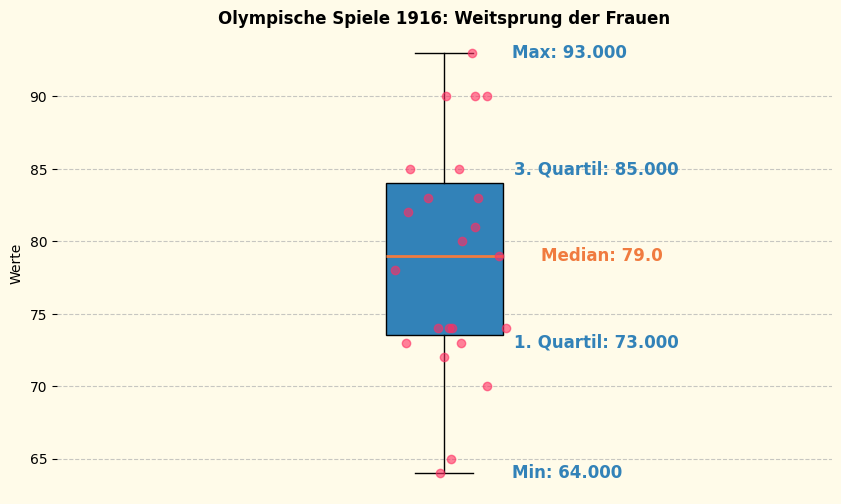

In [38]:
data = [64, 65, 70, 72, 73, 73, 74, 74, 74, 74, 78, 79, 80, 81, 82, 83, 83, 85, 85, 90, 90, 90, 93]
create_boxplot(data, title="Olympische Spiele 1916: Weitsprung der Frauen")

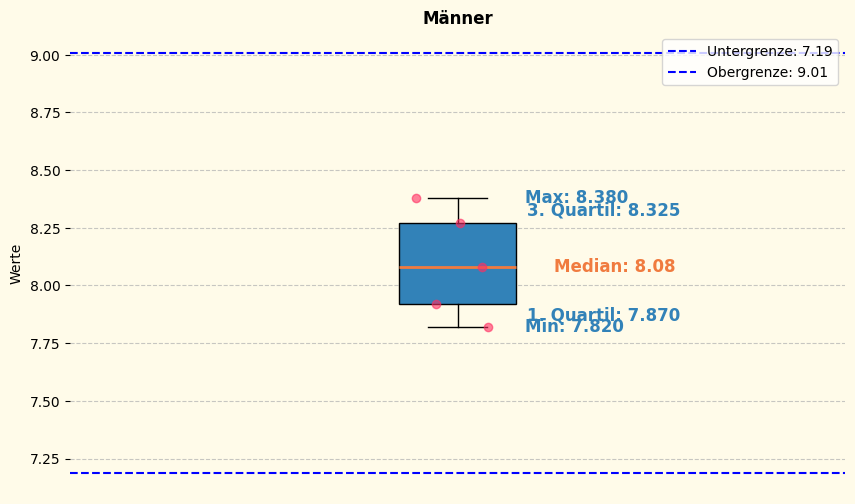

In [39]:
data = [7.82, 7.92, 8.08, 8.27, 8.38]
create_boxplot(data=data, title="Männer", ausreiser=True, ausreiser_grenzen=True)